## Data Analysis: preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
dbpath = '../psd-format/csvs/*'
files = glob.glob(dbpath)
files = [f.replace('\\', '/') for f in files]
files

['../psd-format/csvs/TestControl_150422.csv',
 '../psd-format/csvs/TestDoubleNetwork_1_160422.csv',
 '../psd-format/csvs/TestElectro_1_160422.csv',
 '../psd-format/csvs/TestNormal_1_160422.csv',
 '../psd-format/csvs/TestViento_1_160422.csv',
 '../psd-format/csvs/TestWireless_1_160422.csv']

In [4]:
df = [pd.read_csv(f) for f in files]
for f in range(len(files)):
    df[f] = df[f].drop(['Unnamed: 0'], axis = 1)
df[0].head(20)

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,FRAME_TYPE,SECURITY_ENABLED,FRAME_PENDING,ACKNOWLEDGE_REQ,PAN_COMPRESSION,DEST_PAN,DEST_ADD,SRC_PAN,SRC_ADD
0,1,1,0,0,1,1.187992e+07,11,NaN,-98,1,CMD,0,0,0,0,0xffff,NaN,NaN,NaN
1,1,1,0,0,2,2.863110e+07,11,NaN,-99,1,CMD,0,0,0,0,0xffff,NaN,NaN,NaN
2,1,1,0,0,3,2.863217e+07,14,NaN,-90,1,BCN,0,0,0,0,NaN,NaN,0x0001,0xaabb
3,1,1,0,0,4,2.928487e+07,11,NaN,-91,1,CMD,0,0,0,0,0xffff,NaN,NaN,NaN
4,1,1,0,0,5,2.928688e+07,14,NaN,-90,1,BCN,0,0,0,0,NaN,NaN,0x0001,0xaabb
5,1,1,0,0,6,3.057422e+07,14,NaN,-89,1,BCN,0,0,0,0,NaN,NaN,0x0001,0xaabb
6,1,1,0,0,7,3.066574e+07,22,NaN,-97,1,CMD,0,0,1,0,0x0001,0xaabb,0xffff,0x00124b001ca75ccf
7,1,1,0,0,8,3.066855e+07,22,NaN,-97,1,CMD,0,0,1,0,0x0001,0xaabb,0xffff,0x00124b001ca75ccf
8,1,1,0,0,9,3.067231e+07,22,NaN,-97,1,CMD,0,0,1,0,0x0001,0xaabb,0xffff,0x00124b001ca75ccf
9,1,1,0,0,10,3.067672e+07,22,NaN,-97,1,CMD,0,0,1,0,0x0001,0xaabb,0xffff,0x00124b001ca75ccf


In [5]:
df[0].columns

Index(['FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM', 'TIME(MS)',
       'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE', 'SECURITY_ENABLED',
       'FRAME_PENDING', 'ACKNOWLEDGE_REQ', 'PAN_COMPRESSION', 'DEST_PAN',
       'DEST_ADD', 'SRC_PAN', 'SRC_ADD'],
      dtype='object')

In [6]:
for f in range(len(files)):
    times = df[f]['TIME(MS)'].values
    ms = []
    for i in range(len(times)):
        if i == 0:
            ms.append(0)
        if i > 0:
            t = (times[i] - times[i-1])/1000 #sec
            #print(times[i], t, i)
            ms.append(t)
    df[f]['TIME(MS)'] = pd.Series(ms)

In [7]:
df[0].head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,FRAME_TYPE,SECURITY_ENABLED,FRAME_PENDING,ACKNOWLEDGE_REQ,PAN_COMPRESSION,DEST_PAN,DEST_ADD,SRC_PAN,SRC_ADD
0,1,1,0,0,1,0.000000,11,NaN,-98,1,CMD,0,0,0,0,0xffff,NaN,NaN,NaN
1,1,1,0,0,2,16751.182375,11,NaN,-99,1,CMD,0,0,0,0,0xffff,NaN,NaN,NaN
2,1,1,0,0,3,1.070000,14,NaN,-90,1,BCN,0,0,0,0,NaN,NaN,0x0001,0xaabb
3,1,1,0,0,4,652.697750,11,NaN,-91,1,CMD,0,0,0,0,0xffff,NaN,NaN,NaN
4,1,1,0,0,5,2.006625,14,NaN,-90,1,BCN,0,0,0,0,NaN,NaN,0x0001,0xaabb


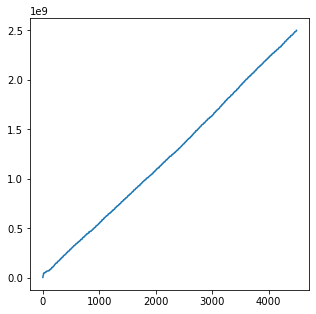

In [8]:
fig1 = plt.figure( figsize=(5,5) )
ax1 = fig1.gca()
ax1.plot(times)

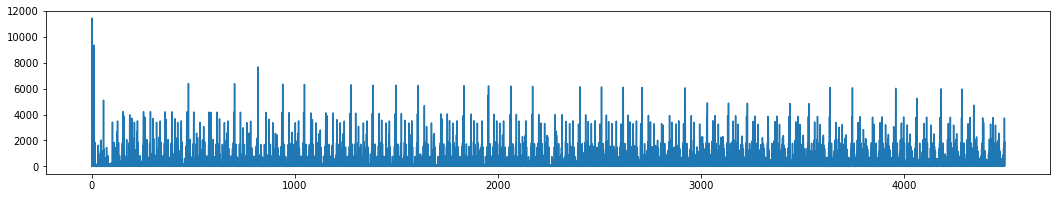

In [9]:
fig2 = plt.figure( figsize=(18,3) )
ax2 = fig2.gca()
ax2.plot(ms)

In [10]:
TYPES = {'DATA': '001',
         'CMD': '011',
         'ACK': '010',
         '1_OCT_HEADER': '100',
         'CSL_WAKEUP': '101',
         'CSL_SECURE_ACK': '110',
         'RFID_BLINK': '111',
         'BCN': '000'}

16751.182375


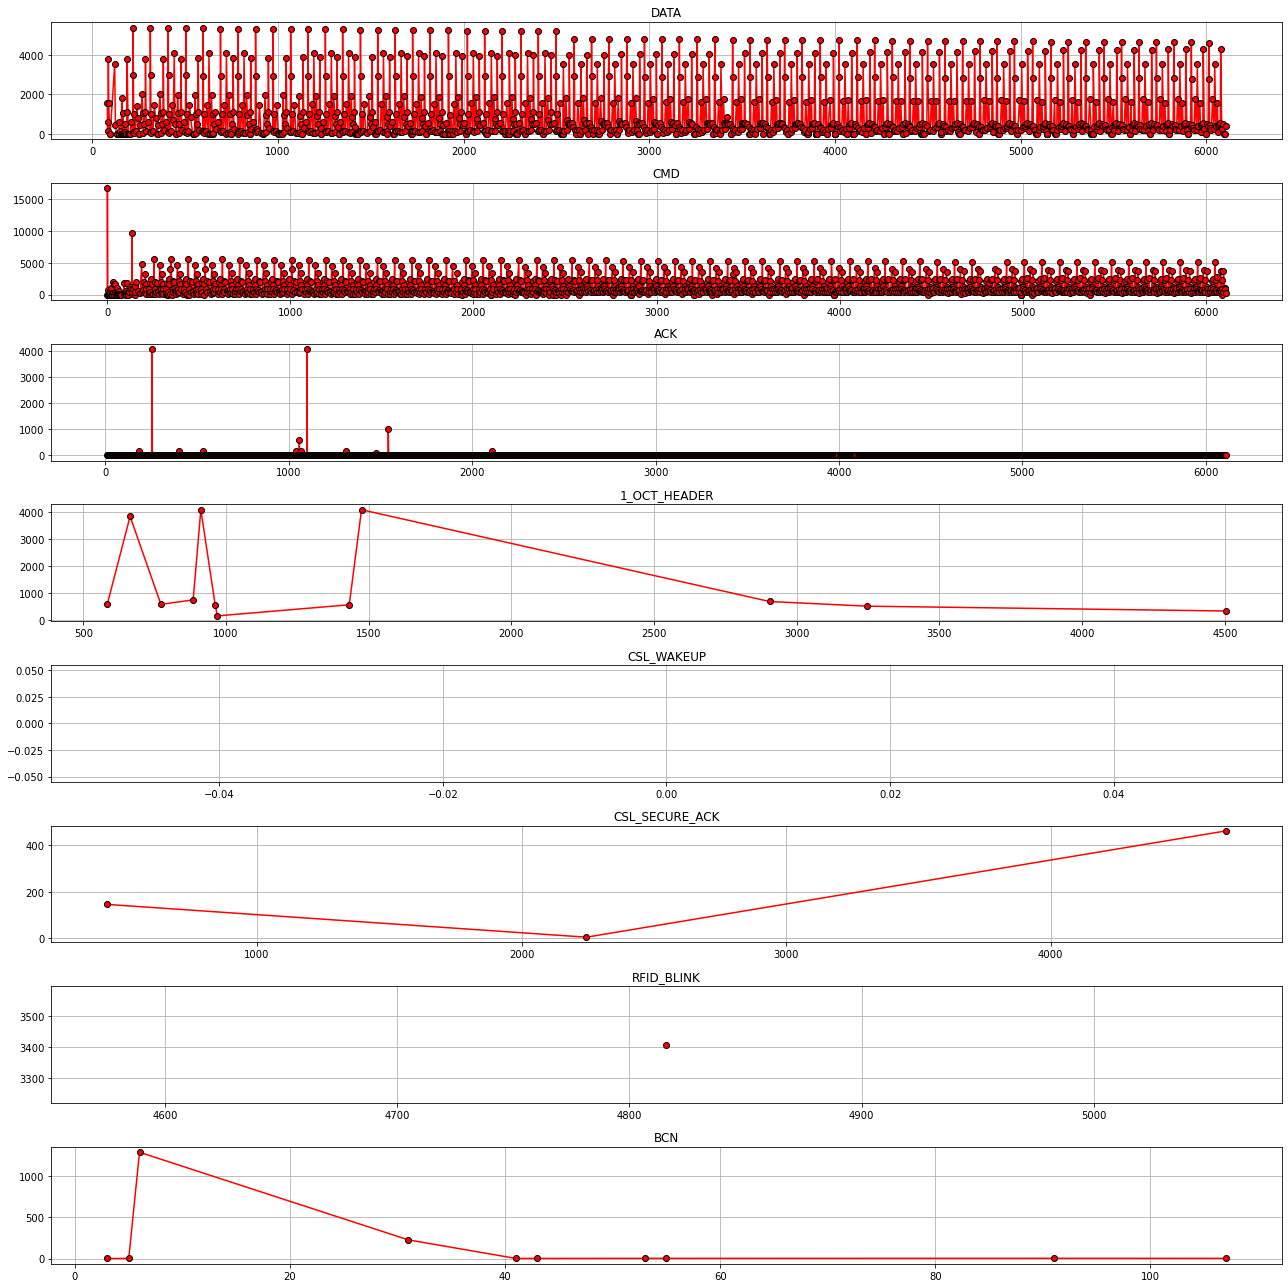

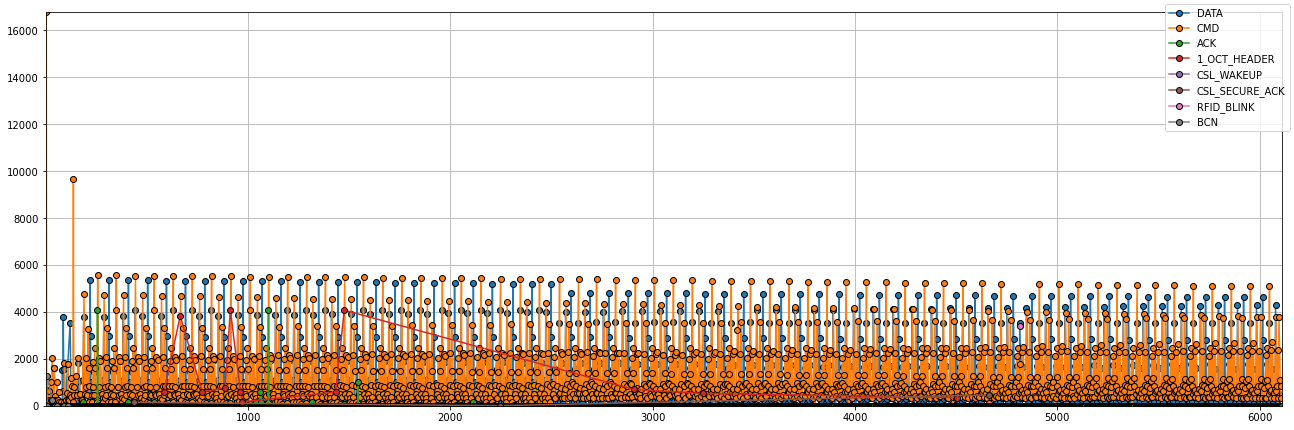

In [23]:
def plot_ts(y_col):
    fct_names = list(TYPES.keys())
    t_per_type = []
    y_max = 0
    y_min = 10000
    x_max = 0
    x_min = 10000
    for ft in TYPES.keys():
        df_per_type = df[0][df[0]['FRAME_TYPE'] == ft][['PCKT_NUM', y_col]]
        t_per_type.append(df_per_type)

        if len(df_per_type['PCKT_NUM'].values) == 0:
            continue
        if min(df_per_type['PCKT_NUM'].values) < x_min:
            x_min = min(df_per_type['PCKT_NUM'].values)

        if max(df_per_type['PCKT_NUM'].values) > x_max:
            x_max = max(df_per_type['PCKT_NUM'].values)

        if min(df_per_type[y_col].values) < y_min:
            y_min = min(df_per_type[y_col].values)

        if max(df_per_type[y_col].values) > y_max:
            y_max = max(df_per_type[y_col].values)

    rows = len(TYPES.keys())
    cols = 1
    print(y_max)
    figt = plt.figure( figsize=(18,18) )
    axes = figt.subplots(rows, cols)
    fig_all = plt.figure( figsize=(18,6) )
    ax_all = fig_all.gca()


    for i in range(len(TYPES.keys())):
        xs = t_per_type[i]['PCKT_NUM'].values
        ys = t_per_type[i][y_col].values
        axes[i].plot(xs, ys, linestyle='-', marker='o', color='red', markeredgecolor='black')
        axes[i].set_title(fct_names[i])
        axes[i].set_axisbelow(True)
        axes[i].grid()

        ax_all.set_xlim(x_min, x_max)
        ax_all.set_ylim(y_min, y_max)
        ax_all.plot(xs, ys, linestyle='-', marker='o', markeredgecolor='black', label = fct_names[i])
    ax_all.set_axisbelow(True)
    ax_all.grid()
    figt.tight_layout()
    fig_all.legend()
    fig_all.tight_layout()
    plt.savefig(f"{y_col}.png", dpi=500)
    plt.show()
plot_ts('TIME(MS)')

0


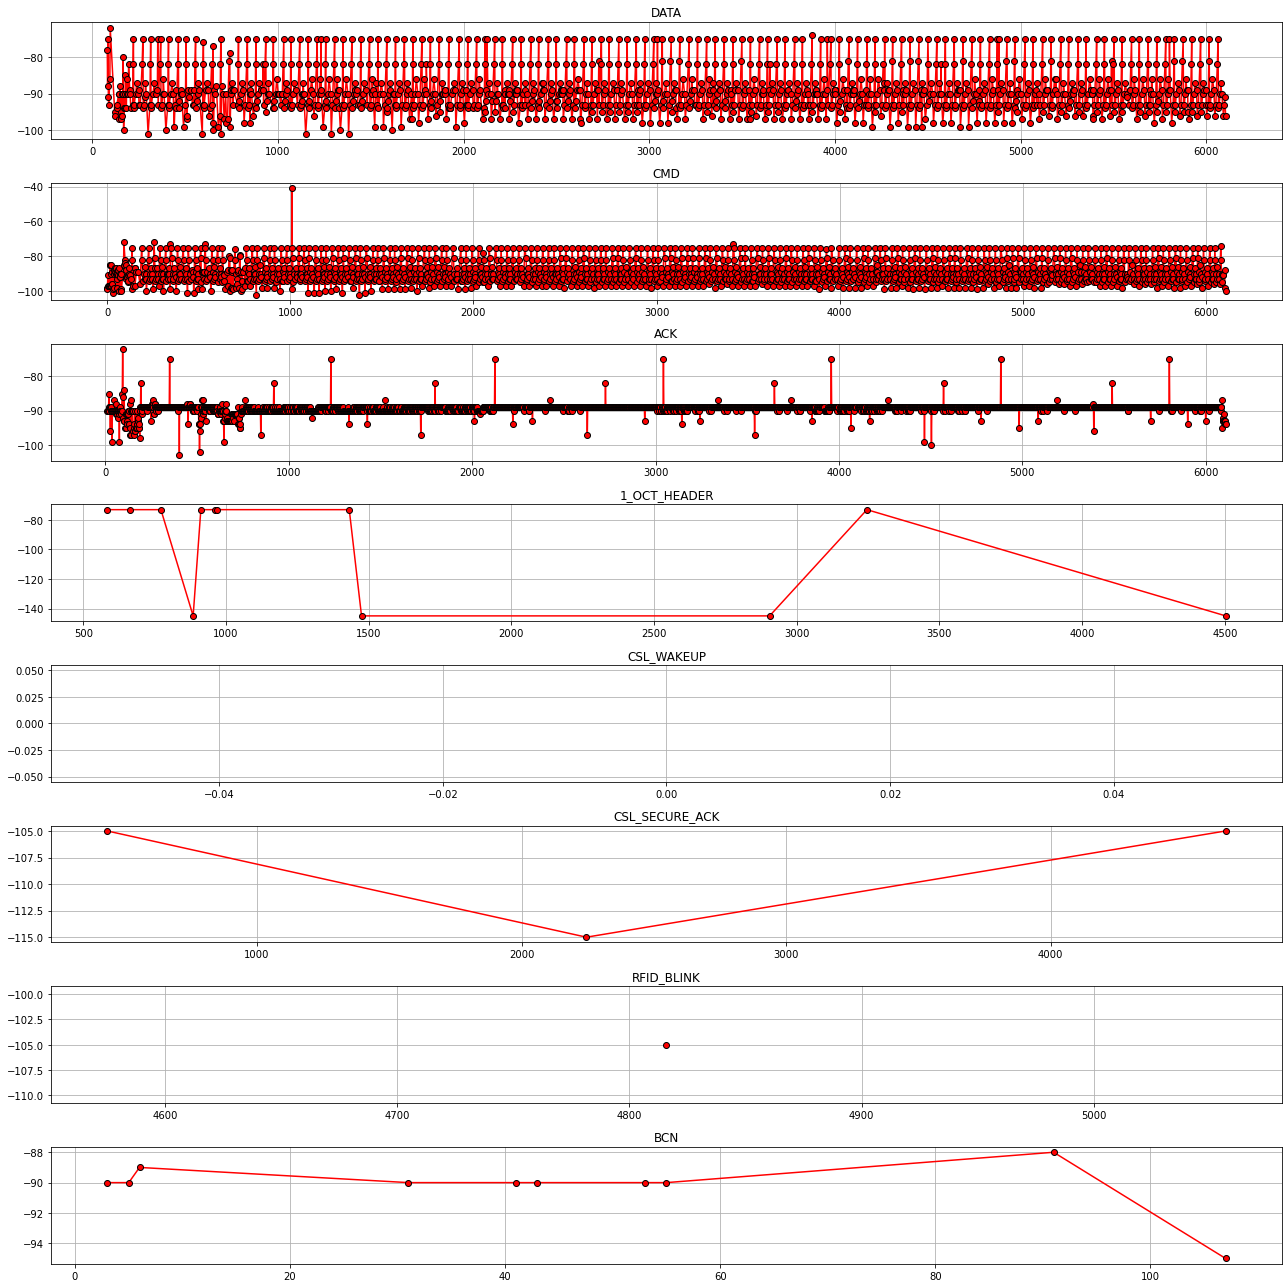

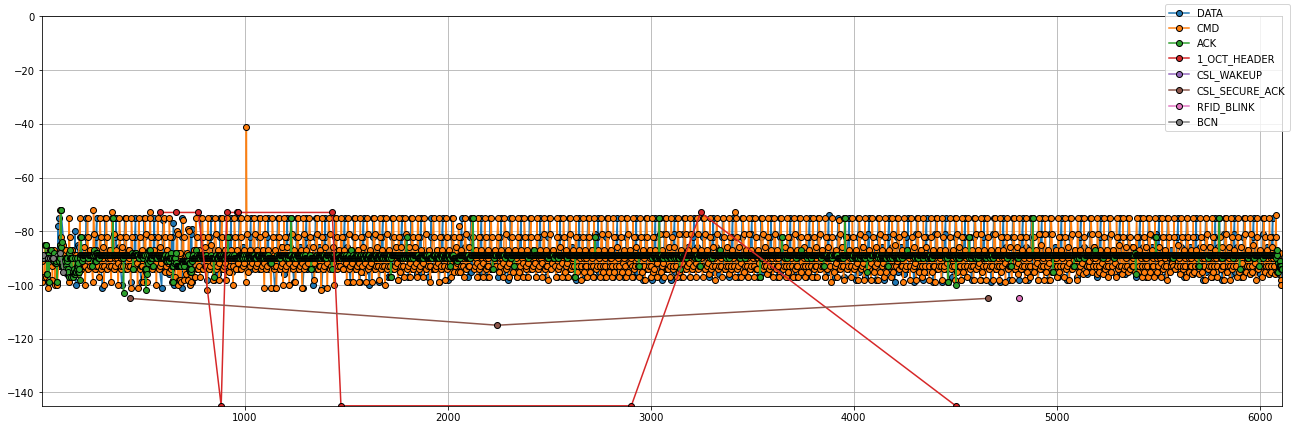

In [24]:
plot_ts('RSSI')

In [12]:
for i in range(len(files)):
    print(files[i])
    # binarize the frame type
    for frame in TYPES.keys():
        s = (df[i]['FRAME_TYPE'] == frame).map({True: 1, False: 0})
        d = pd.DataFrame({frame:s})
        df[i] = pd.concat([df[i], d], axis=1)
    # get the test type from filename
    test = (files[i].split('/')[-1]).split('_')[0].replace('Test','').lower()
    # fill a column with test name
    s = (df[i]['PCKT_NUM']!='').map({True: test, False: test})
    d = pd.DataFrame({'TEST_TYPE':s})
    df[i] = pd.concat([df[i], d], axis=1)
df[0].head()

../psd-format/csvs/TestControl_150422.csv
../psd-format/csvs/TestDoubleNetwork_1_160422.csv
../psd-format/csvs/TestElectro_1_160422.csv
../psd-format/csvs/TestNormal_1_160422.csv
../psd-format/csvs/TestViento_1_160422.csv
../psd-format/csvs/TestWireless_1_160422.csv


,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,SRC_ADD,DATA,CMD,ACK,1_OCT_HEADER,CSL_WAKEUP,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE
0,1,1,0,0,1,0.000000,11,NaN,-98,1,...,NaN,0,1,0,0,0,0,0,0,control
1,1,1,0,0,2,16751.182375,11,NaN,-99,1,...,NaN,0,1,0,0,0,0,0,0,control
2,1,1,0,0,3,1.070000,14,NaN,-90,1,...,0xaabb,0,0,0,0,0,0,0,1,control
3,1,1,0,0,4,652.697750,11,NaN,-91,1,...,NaN,0,1,0,0,0,0,0,0,control
4,1,1,0,0,5,2.006625,14,NaN,-90,1,...,0xaabb,0,0,0,0,0,0,0,1,control


In [13]:
df[-1].head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,SRC_ADD,DATA,CMD,ACK,1_OCT_HEADER,CSL_WAKEUP,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE
0,1,1,0,0,1,0.000000,19,NaN,-100.0,1.0,...,0x00124b0014f64104,0,1,0,0,0,0,0,0,wireless
1,1,1,0,0,2,6676.254625,11,NaN,-99.0,1.0,...,NaN,0,1,0,0,0,0,0,0,wireless
2,1,1,0,0,3,11434.126125,19,NaN,-90.0,1.0,...,0x00124b0014f64244,0,1,0,0,0,0,0,0,wireless
3,1,1,0,0,4,195.075375,11,NaN,-85.0,1.0,...,NaN,0,1,0,0,0,0,0,0,wireless
4,1,1,0,0,5,2.978125,14,NaN,-92.0,1.0,...,0xaabb,0,0,0,0,0,0,0,1,wireless


In [14]:
test_names = [(f.split('/')[-1]).split('_')[0].replace('Test','').lower() for f in files]
test_names

['control', 'doublenetwork', 'electro', 'normal', 'viento', 'wireless']

In [15]:
for i in range(len(files)):
    print(files[i])
    for test in test_names:
        s = (df[i]['TEST_TYPE'] == test).map({True: 1, False: 0})
        d = pd.DataFrame({test.upper():s})
        df[i] = pd.concat([df[i], d], axis=1)

../psd-format/csvs/TestControl_150422.csv
../psd-format/csvs/TestDoubleNetwork_1_160422.csv
../psd-format/csvs/TestElectro_1_160422.csv
../psd-format/csvs/TestNormal_1_160422.csv
../psd-format/csvs/TestViento_1_160422.csv
../psd-format/csvs/TestWireless_1_160422.csv


In [16]:
df[0].head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS
0,1,1,0,0,1,0.000000,11,NaN,-98,1,...,0,0,0,control,1,0,0,0,0,0
1,1,1,0,0,2,16751.182375,11,NaN,-99,1,...,0,0,0,control,1,0,0,0,0,0
2,1,1,0,0,3,1.070000,14,NaN,-90,1,...,0,0,1,control,1,0,0,0,0,0
3,1,1,0,0,4,652.697750,11,NaN,-91,1,...,0,0,0,control,1,0,0,0,0,0
4,1,1,0,0,5,2.006625,14,NaN,-90,1,...,0,0,1,control,1,0,0,0,0,0


In [17]:
df[-1].head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS
0,1,1,0,0,1,0.000000,19,NaN,-100.0,1.0,...,0,0,0,wireless,0,0,0,0,0,1
1,1,1,0,0,2,6676.254625,11,NaN,-99.0,1.0,...,0,0,0,wireless,0,0,0,0,0,1
2,1,1,0,0,3,11434.126125,19,NaN,-90.0,1.0,...,0,0,0,wireless,0,0,0,0,0,1
3,1,1,0,0,4,195.075375,11,NaN,-85.0,1.0,...,0,0,0,wireless,0,0,0,0,0,1
4,1,1,0,0,5,2.978125,14,NaN,-92.0,1.0,...,0,0,1,wireless,0,0,0,0,0,1


In [18]:
db = df[0].copy()
for i in range(1, len(df)):
    db = pd.concat([db, df[i]], ignore_index = True, axis = 0)
db.shape

(33543, 34)

In [19]:
db.to_csv('db.csv')

In [20]:
db.columns

Index(['FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM', 'TIME(MS)',
       'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE', 'SECURITY_ENABLED',
       'FRAME_PENDING', 'ACKNOWLEDGE_REQ', 'PAN_COMPRESSION', 'DEST_PAN',
       'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'DATA', 'CMD', 'ACK', '1_OCT_HEADER',
       'CSL_WAKEUP', 'CSL_SECURE_ACK', 'RFID_BLINK', 'BCN', 'TEST_TYPE',
       'CONTROL', 'DOUBLENETWORK', 'ELECTRO', 'NORMAL', 'VIENTO', 'WIRELESS'],
      dtype='object')